<h1>Loan Approval Prediction Project</h1>

<h2>Lifecycle of Machine Learning Project</h2>

1. Understanding of problem Statement
2. Data Collection
3. Data checks for performance
4. Exploratory Data Analysis
5. Data Pre Processing
6. Model Training
7. Choose Best Model

<h3>1. Understanding of Problem Statment</h3>

The company seeks to automate (in real time) the loan approval procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

<h3>2. Data Collection</h3>

Data is collected from AWS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import pygwalker as pyg
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"D:\DS_Stats\E2E_DS_Propjects\Loan-Approval-Prediction-Project\raw_data\LoansTrainingSetV2 (1).csv")

In [3]:
df.shape

(111107, 19)

The data consists of 111107 rows and 19 columns

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

The data has 9 Categorical Features and 10 Numerical Features

<h3>3. Performing Data Check and EDA</h3>

- Check Duplicates
- Check Datatypes
- Check numbers of unique values in a column
- Check the statistics of the dataset
- Check various categories present in different categorical columns
- Check for missing values
- EDA

<h4>3.1 Check Duplicates

In [6]:
df.duplicated().sum()

5869

There 5869 rows with dupliate values where all the compones in the entry is duplicate of another entry

In [7]:
df_col_2_duplicate = df[df['Customer ID'].duplicated()==True]
df_col_2_duplicate.shape

(22197, 19)

In [8]:
df_col_1_duplicate = df[df['Loan ID'].duplicated()==True]
df_col_1_duplicate.shape

(22197, 19)

On deeper analysis it was found there are 22197 duplicate entries with same Loan ID and Customer ID. This needs to be removed to reduce overfitting and bias in model. 

In [9]:
df.shape

(111107, 19)

In [10]:

df_duplicates_removed = df.drop_duplicates(subset='Loan ID',keep='first',inplace=False)

In [11]:
df_duplicates_removed.shape

(88910, 19)

22197 duplicate records removed from the data

<h4>3.2 Check Datatypes of Features

In [12]:
column_datatypes = df_duplicates_removed.dtypes
print(column_datatypes)


Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [13]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

In [14]:
print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Categorical Feature which are : {numerical_features}')

We have 9 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Maximum Open Credit']

We have 10 Categorical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens']


<h4>3.3 Check for Unique Values in Feature

In [15]:
df_duplicates_removed.nunique()

Loan ID                         88910
Customer ID                     88910
Loan Status                         2
Current Loan Amount             22081
Term                                2
Credit Score                      326
Years in current job               11
Home Ownership                      4
Annual Income                   36344
Purpose                            16
Monthly Debt                    76609
Years of Credit History           508
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33716
Maximum Open Credit             58216
Bankruptcies                        8
Tax Liens                          13
dtype: int64

<h4>3.4 Check Statistic for Numerical Features

In [16]:
df_duplicates_removed.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,8.891000e+04,67572.000000,6.757200e+04,88910.000000,40404.000000,88910.000000,88910.000000,8.891000e+04,88718.000000,88902.000000
mean,1.433878e+07,1199.199580,7.234575e+04,18.315313,35.080289,11.110348,0.160477,1.543593e+04,0.112672,0.028222
std,3.502996e+07,1680.813805,5.836101e+04,7.049175,22.008583,4.978461,0.473746,1.965873e+04,0.343300,0.257533
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.283000e+03,714.000000,4.458600e+04,13.500000,16.000000,8.000000,0.000000,5.949000e+03,0.000000,0.000000
50%,1.435500e+04,733.000000,6.149400e+04,17.000000,32.000000,10.000000,0.000000,1.103900e+04,0.000000,0.000000
75%,2.448500e+04,744.000000,8.675025e+04,21.800000,51.000000,14.000000,0.000000,1.930100e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.000000,15.000000


<h4>3.5 Check for various categories present in categorical feature

In [17]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

It seems Monthly Debt and Maximum Open Credit have numerical values but the datatype is object. We will convert these feature to float datatype

In [18]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].str.replace('$','')

In [19]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].astype(float)

In [20]:
df_duplicates_removed['Maximum Open Credit'] = pd.to_numeric(df_duplicates_removed['Maximum Open Credit'], errors='coerce')

In [21]:
df_duplicates_removed['Maximum Open Credit'] = df_duplicates_removed['Maximum Open Credit'].astype(float)

In [22]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Categorical Feature which are : {numerical_features}')

We have 7 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

We have 12 Categorical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [23]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

<h4>3.6 Check for Missing Values and Analysis</h4>

In [24]:
null_percentage= df_duplicates_removed.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

Credit Score                    19.204911
Years in current job             3.435427
Annual Income                   19.204911
Monthly Debt                    21.037378
Months since last delinquent    43.657015
Maximum Open Credit              0.001800
Bankruptcies                     0.172806
Tax Liens                        0.007200
dtype: float64


<Axes: >

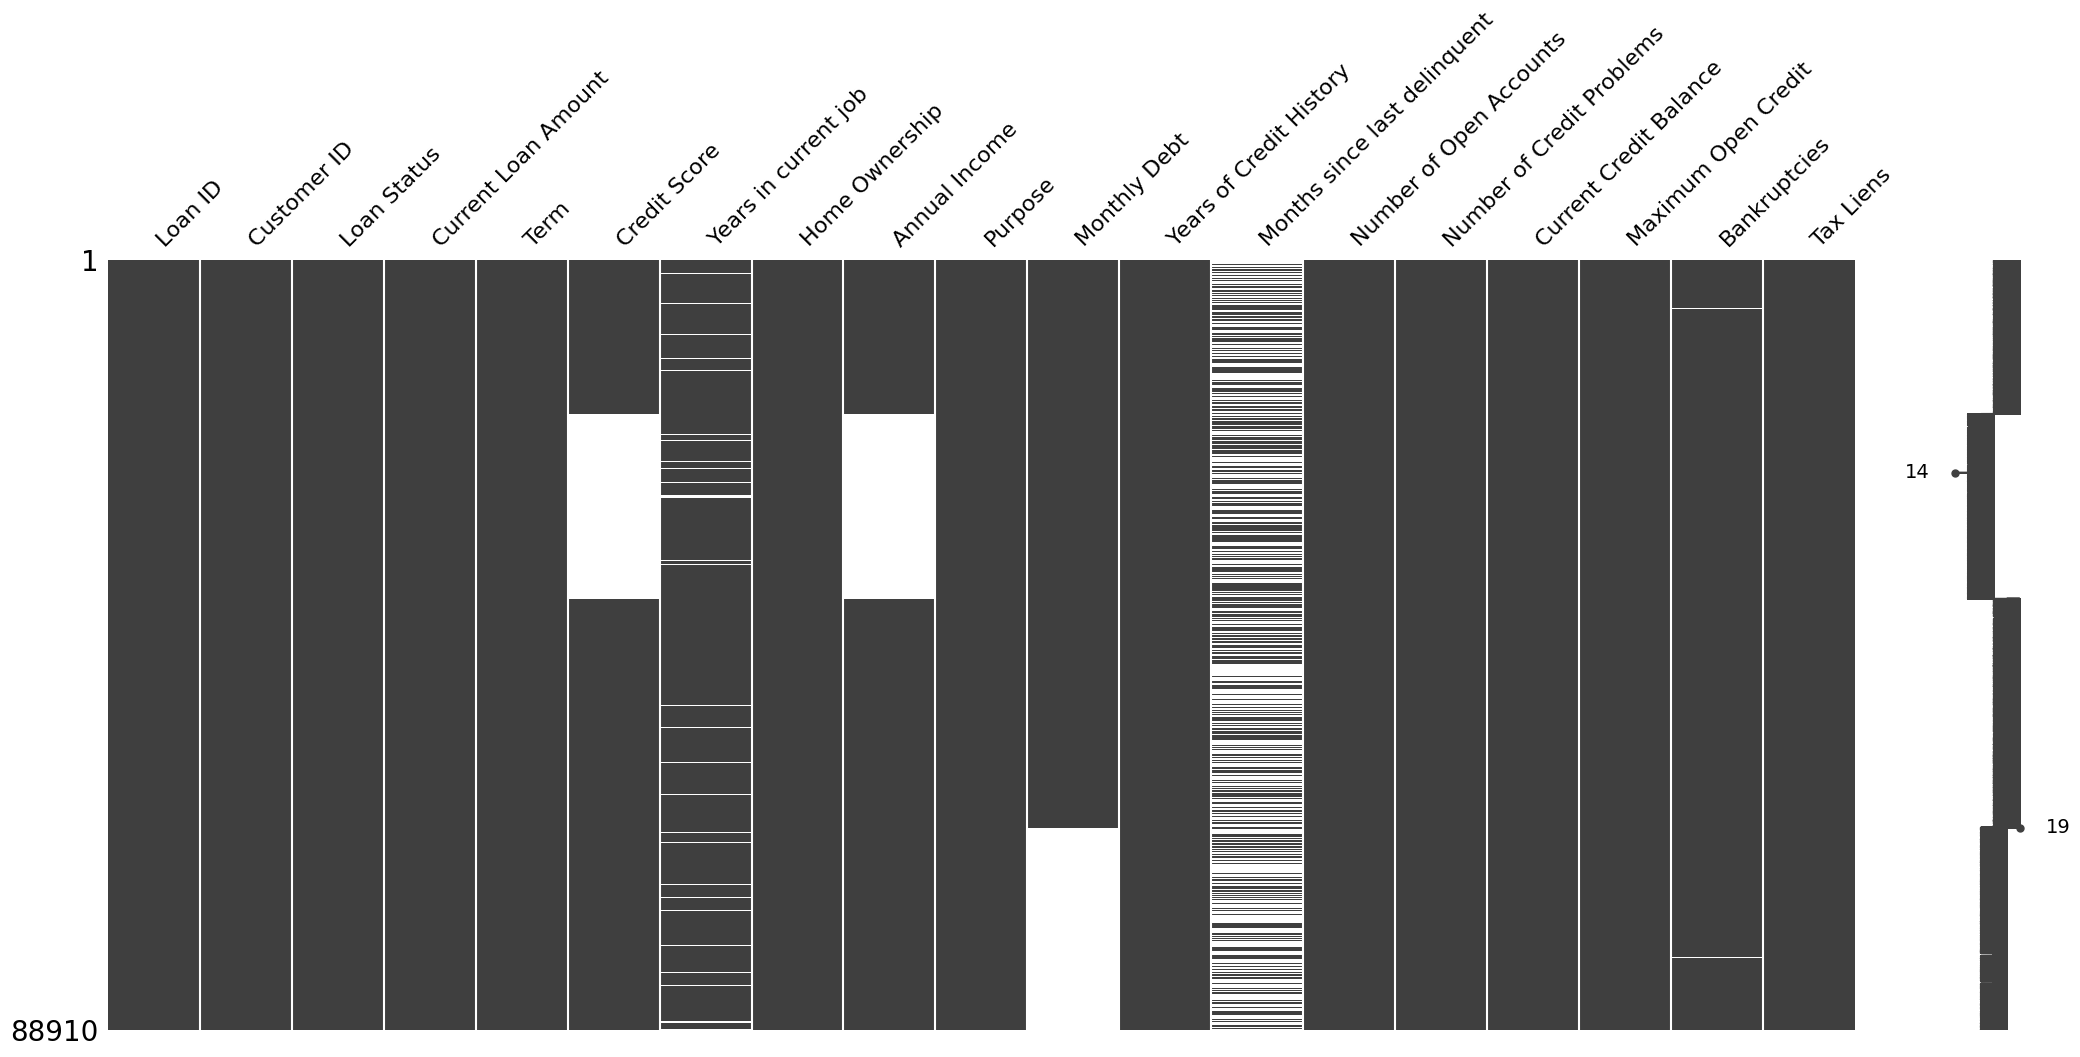

In [25]:
import missingno as msno
msno.matrix(df_duplicates_removed)

<Axes: >

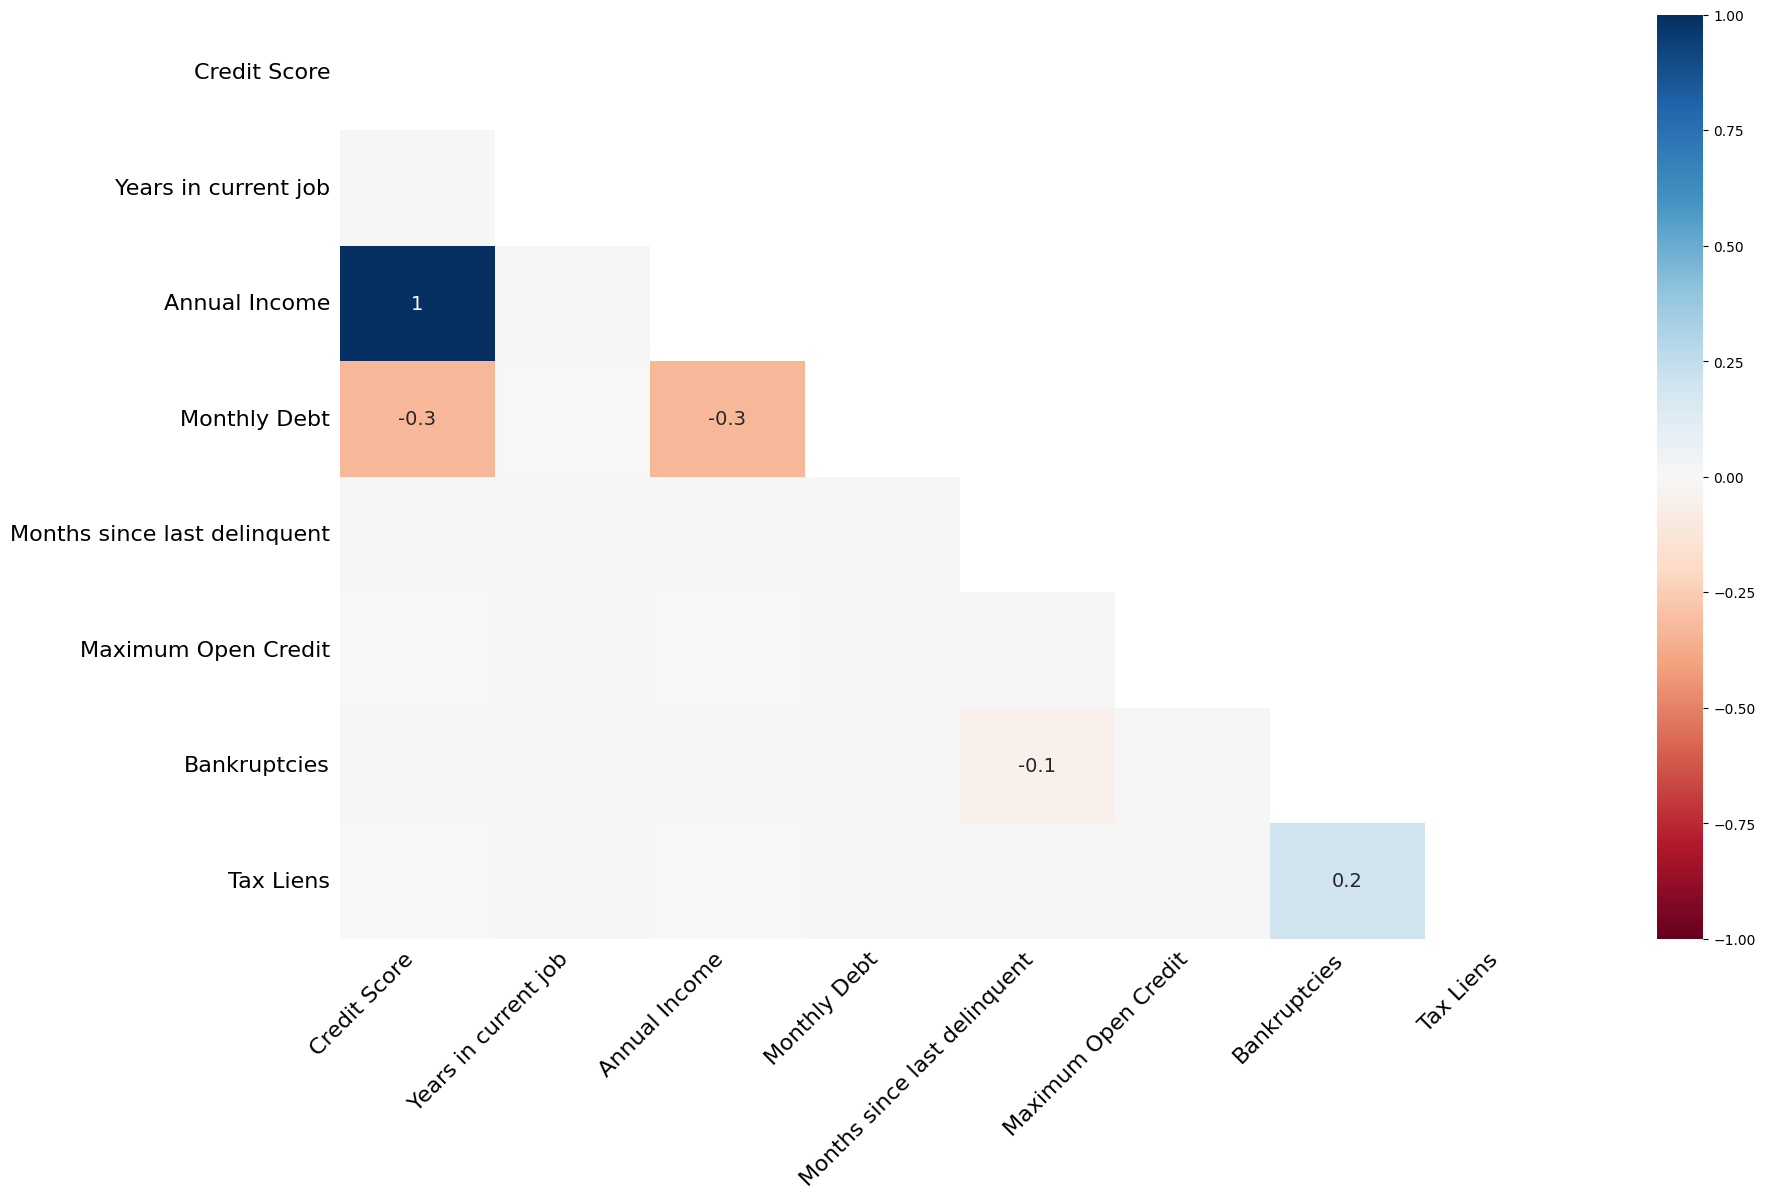

In [26]:
msno.heatmap(df_duplicates_removed)

<Axes: >

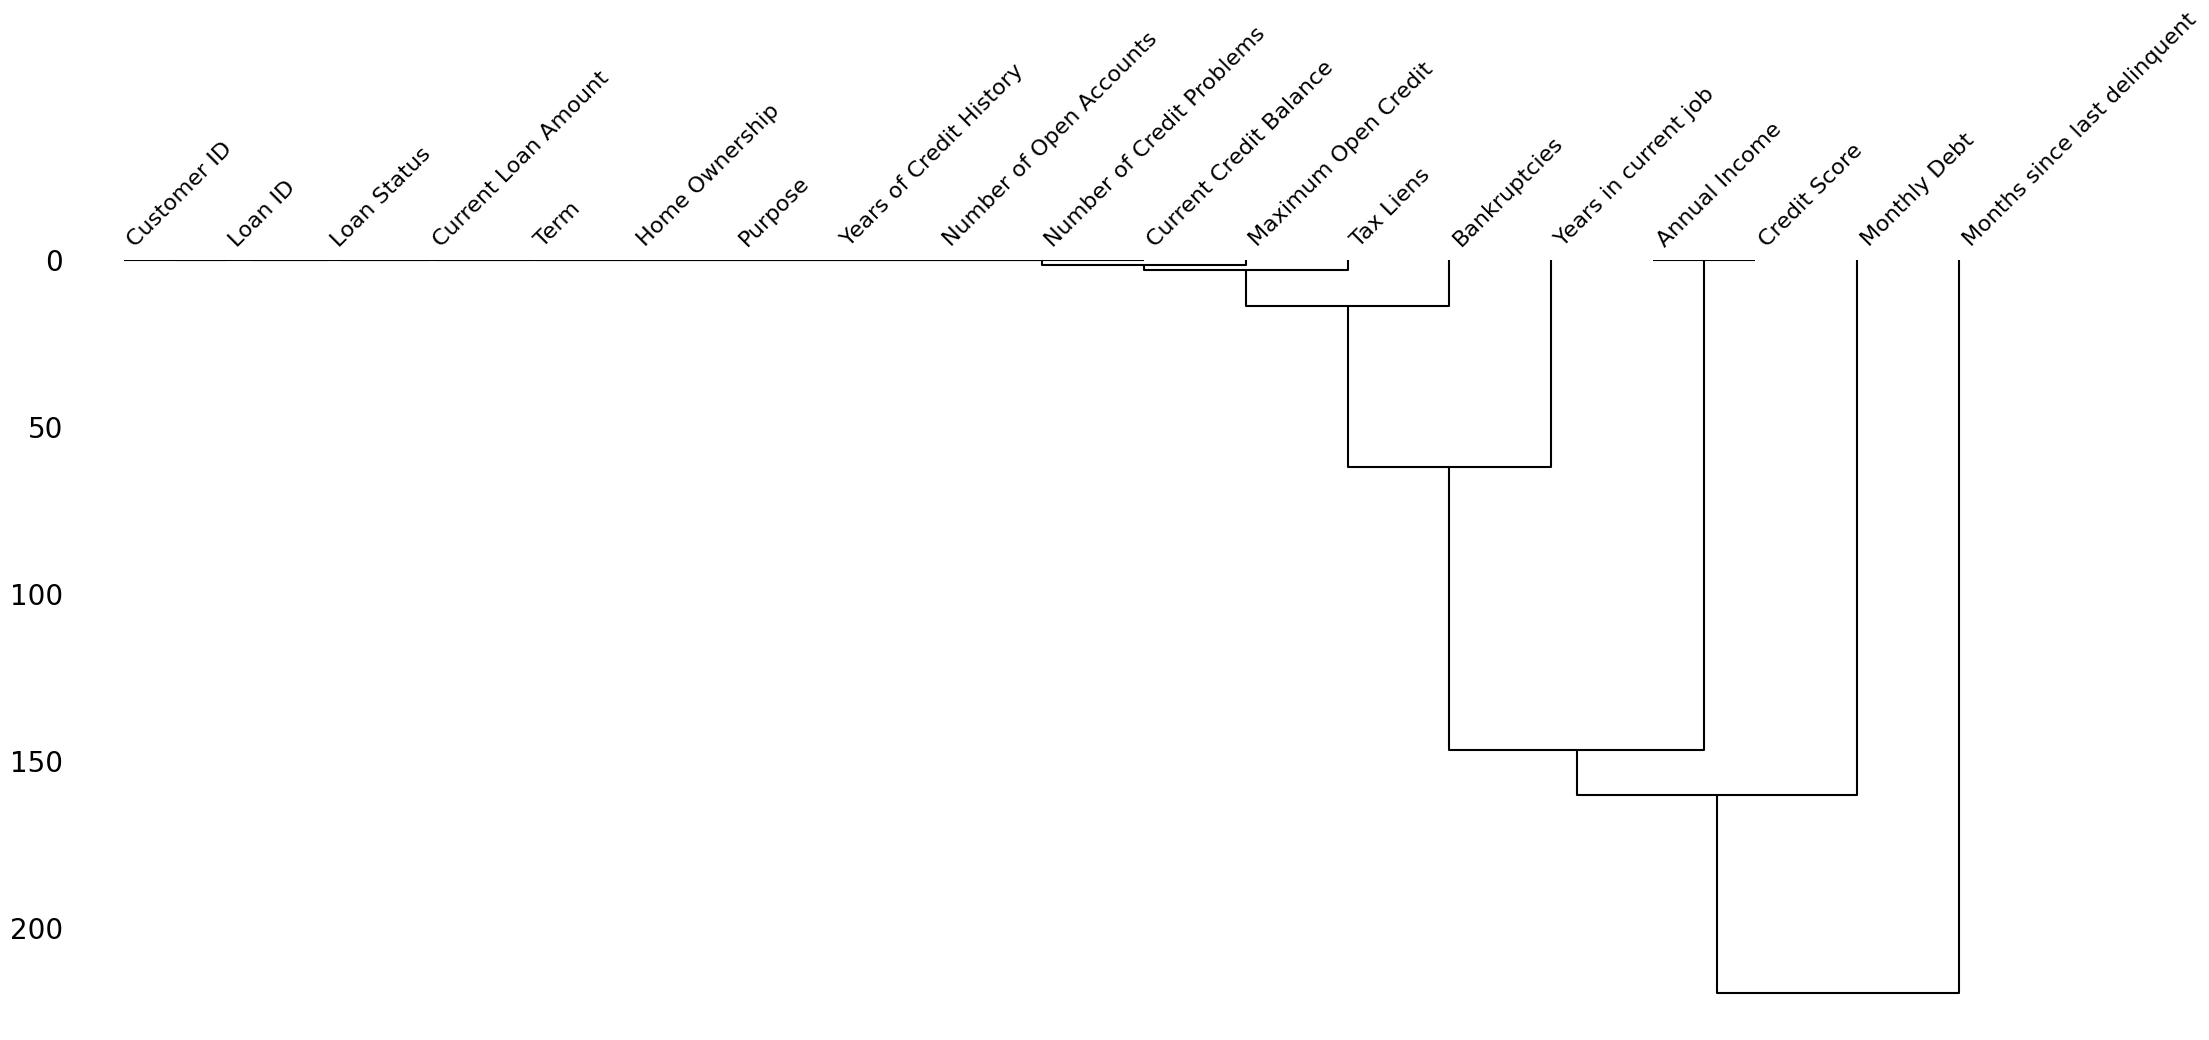

In [27]:
msno.dendrogram(df_duplicates_removed)

Insights:

- There are a total of 8 columns where we found records with missing values with the highest missing percent of 43% for the feature 'Months since last delinquency'.
- We have also found if records from the 'Annual Income' feature are missing then records from 'Credit Score' are also missing. They have a correlation value of 1 for nullity.
- Monthly Debt has a low negative correlation(-0.3) with Annual income and Credit Score. Meaning, that if Monthly debt is missing then the other features are present in the record.
- Rest of the features with null values have very low correlation or no correlation at all.

<h4>3.7 Exploratory Data Analysis(EDA)

<h5>3.7.1 Visualisation of Loan Status(Target Feature)

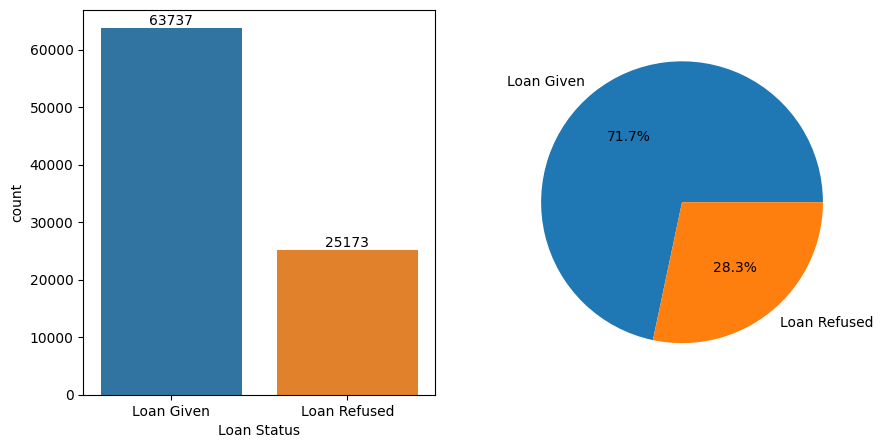

In [28]:
status = df_duplicates_removed['Loan Status'].value_counts()
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x=df_duplicates_removed['Loan Status'],ax=ax[0],data=df_duplicates_removed,order=df_duplicates_removed['Loan Status'].value_counts().index)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=10)
plt.pie(x=df_duplicates_removed['Loan Status'].value_counts(),labels=df_duplicates_removed['Loan Status'].value_counts().index,autopct='%1.1f%%')
plt.show()

No. of Loans Given is 2.5 times more than no. of Loan Refused. This makes the data bias as more number of records are present for Loan Given status.

<h5>3.7.2 Visualisation of Numerical Categories via Histplot

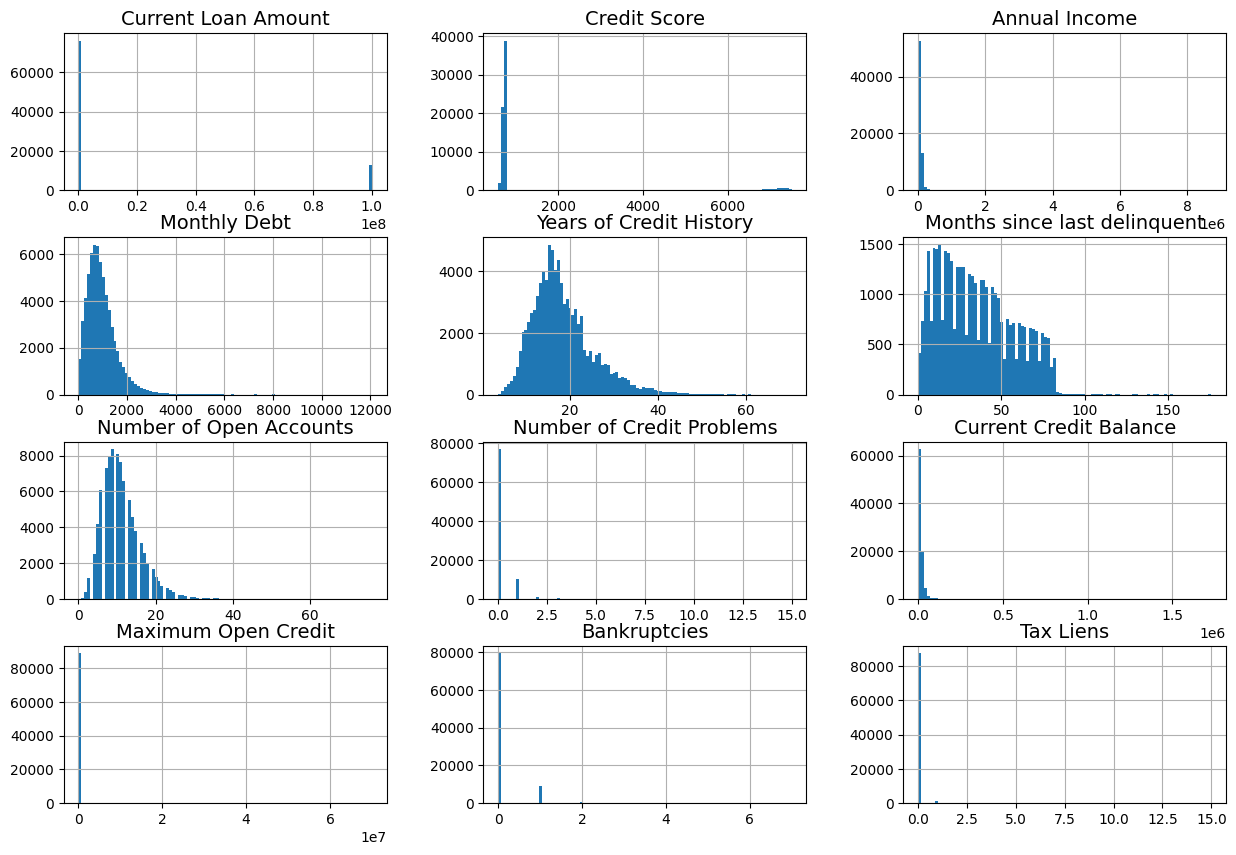

In [29]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed.hist(bins=100, figsize=(15, 10), )
plt.show()

There are lot of outliers in the dataset. We will first explore the data ignoring the outliers to understand how is the data dritributed.

<h5>3.7.3 Featurewise Exploration and Analysis

Loan ID and Customer ID are unique values representing customers. We will ignore these from EDA.

3.7.3.1 Current Loan Amount

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [30]:
def explore_num_feature(df,variable):
    # Name of the feature
    print(f'Name of the Feature is {variable}')

    # Type of the feature
    if df[variable].dtype == 'object':
        type = 'Categorical Feature'
    else:
        type = 'Numerical Feature'
        
    num_of_unique_values = df[variable].nunique()
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    
    # Ask for subtype
    if type == 'Categorical Feature':
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Ordinal/Nominal: ')
    else:
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Continuous/Discrete: ')
    
    print(f'{variable} is {type} and {sub_type}')

    # Calculate Null Percentage

    null_percentage = df.isnull().sum() / df.shape[0] * 100
    null_percentage_variable = null_percentage[variable]
    print(f'Null %age of {variable} is {null_percentage_variable}%')

    #Finding Outliers

    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR is {IQR}')
    outliers = df[variable][
    (df[variable] < (Q1 - 1.5 * IQR)) |
    (df[variable] > (Q3 + 1.5 * IQR))
    ]
    min_outlier_val = df[variable].min()
    min_outlier_count = df[variable].value_counts().get(min_outlier_val,0)
    
    max_outlier_val = df[variable].max()
    max_outlier_count = df[variable].value_counts().get(max_outlier_val,0) 
    
    quantile = df[variable].quantile([0.0,0.2,0.5,0.75,0.8,0.85,0.9,0.95,0.99,0.995,0.999,0.9999])
    skewness = stats.skew(df[variable])
    kurtosis = stats.kurtosis(df[variable])
    
    print('\n\nSUMMARY')
    print(f'\nName of the Feature is {variable}')
    print(f'{variable} is {type} and {sub_type}')
    print(f'Null %age of {variable} is {null_percentage_variable}%')
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    print(f'Total number of outliers in {variable} is {len(outliers)}')
    print(f'Minimum value of outliers in {variable} is {min_outlier_val}'
        f' and number of times its repeated is {min_outlier_count}')
    print(f'Maximum value of outliers in {variable} is {max_outlier_val}'
        f' and number of times its repeated is {max_outlier_count}')
    print(f'{variable} Skewness: {skewness}, Kurtosis: {kurtosis}')
    print(f'\nThe values at various quantiles are\n\n{quantile}')
    


In [31]:
explore_num_feature(df_duplicates_removed,'Current Loan Amount')

Name of the Feature is Current Loan Amount
The number of unique values in Current Loan Amount is 22081
Current Loan Amount is Numerical Feature and Discrete
Null %age of Current Loan Amount is 0.0%
IQR is 16202.0


SUMMARY

Name of the Feature is Current Loan Amount
Current Loan Amount is Numerical Feature and Discrete
Null %age of Current Loan Amount is 0.0%
The number of unique values in Current Loan Amount is 22081
Total number of outliers in Current Loan Amount is 12738
Minimum value of outliers in Current Loan Amount is 491 and number of times its repeated is 1
Maximum value of outliers in Current Loan Amount is 99999999 and number of times its repeated is 12738
Current Loan Amount Skewness: 2.0364500067989493, Kurtosis: 2.1471290159688436

The values at various quantiles are

0.0000         491.0
0.2000        7278.0
0.5000       14355.0
0.7500       24485.0
0.8000       29316.0
0.8500       35487.0
0.9000    99999999.0
0.9500    99999999.0
0.9900    99999999.0
0.9950    99999999

It seems there is are outliers in the current loan amount which is making the plot very skewed. We will filter out the outliers and then make the plot

In [32]:
filtered_outliers_CLA = df_duplicates_removed[df_duplicates_removed["Current Loan Amount"] < 99999998]

In [56]:
def explore_num_feature_distribution(df,variable):
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(4, 1, figsize=(5, 10))

    # Visualize histogram
    sns.histplot(data=df, x=variable, kde=False, color='skyblue', bins=30, ax=axs[0])
    axs[0].set_title(f'Histogram of {variable}')
    axs[0].set_xlabel(f'{variable}')
    axs[0].set_ylabel('Frequency')

    # Plot KDE plot
    sns.kdeplot(data=df, x=variable, color='skyblue', fill=True, ax=axs[1])
    axs[1].set_title(f'KDE Plot of Feature {variable}')
    axs[1].set_xlabel(f'{variable}')
    axs[1].set_ylabel('Density')

    # Visualize boxplot
    sns.boxplot(data=df,x=df[variable], ax=axs[2])
    axs[2].set_title(f'Boxplot of {variable}')

    #Visualise Q-Q Plot
    stats.probplot(df[variable], dist="norm", plot=plt)
    axs[3].set_title(f'Q-Q Plot of {variable}')


    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

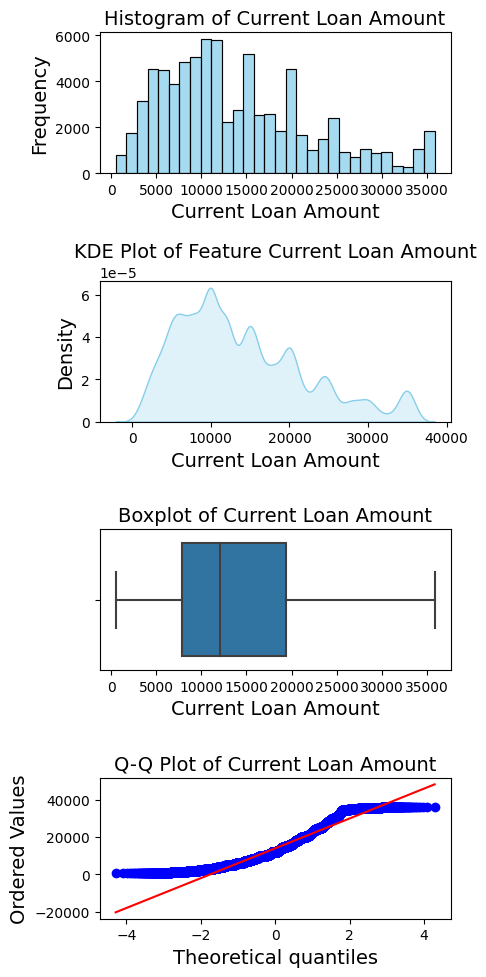

In [57]:
explore_num_feature_distribution(filtered_outliers_CLA,'Current Loan Amount')

In [35]:
filtered_outliers_CLA['Current Loan Amount'].skew()

0.7955602455299323

We can see the feature is right skewed even after outliers are filterd. We Saw the outliers was 9999999. Arond 10% of the records have the value. We will replace it with random values so as not to disturb with distribution.

Even after replacing 99999999 we might have to remove outliers.

In [36]:
def bivariate_analysis_num_cat(df, num_feature, cat_feature):
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(3, 1, figsize=(5, 10))  # Increase height to avoid overlapping

    # Visualize histogram
    sns.histplot(data=df, x=num_feature, hue=cat_feature, kde=True, color='skyblue', bins=30, ax=axs[0])
    axs[0].set_title(f'Histogram of {num_feature}')
    axs[0].set_xlabel(f'{num_feature}')
    axs[0].set_ylabel('Frequency')

    # Visualize violinplot
    sns.violinplot(data=df, x=cat_feature, y=num_feature, inner='quartile', color='white', ax=axs[1])
    axs[1].set_title(f'Violinplot of {num_feature}')
    axs[1].set_xlabel(f'{cat_feature}')
    axs[1].set_ylabel(f'{num_feature}')

    # Visualize boxplot
    sns.boxplot(data=df, x=cat_feature, y=num_feature, ax=axs[2])  
    axs[2].set_title(f'Box Plot of {num_feature} vs {cat_feature}')
    

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


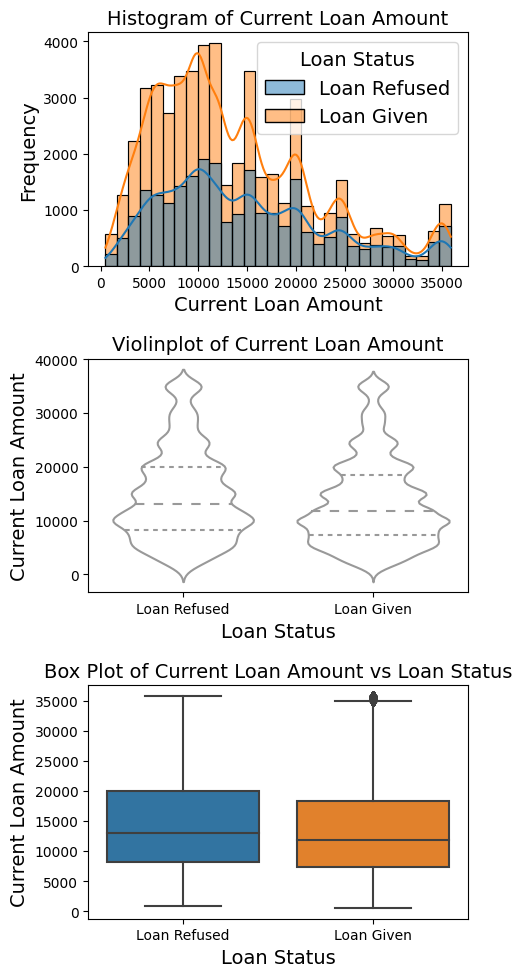

In [37]:
bivariate_analysis_num_cat(filtered_outliers_CLA,'Current Loan Amount','Loan Status')

Insights: We can see that of getting loan approval chances are higher if the Current Loan Amount is in IQR.

3.7.3.2 Term

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [67]:
def explore_cat_feature(df,variable):
    # Name of the feature
    print(f'Name of the Feature is {variable}')

    # Type of the feature
    if df[variable].dtype == 'object':
        type = 'Categorical Feature'
    else:
        type = 'Numerical Feature'
        
    num_of_unique_values = df[variable].nunique()
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    
    # Ask for subtype
    if type == 'Categorical Feature':
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Ordinal/Nominal: ')
    else:
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Continuous/Discrete: ')
    
    print(f'{variable} is {type} and {sub_type}')

    # Calculate Null Percentage

    null_percentage = df.isnull().sum() / df.shape[0] * 100
    null_percentage_variable = null_percentage[variable]
    print(f'Null %age of {variable} is {null_percentage_variable}%')

    #Finding Unique Records
    unique_records = df[variable].unique()
    
    print('\n\nSUMMARY')
    print(f'\nName of the Feature is {variable}')
    print(f'{variable} is {type} and {sub_type}')
    print(f'Null %age of {variable} is {null_percentage_variable}%')
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    print(f'The unique records are {unique_records}')

In [39]:
def explore_cat_feature_distribution(df,variable):
    f,ax = plt.subplots(1,2,figsize = (10,6))
    sns.countplot(x= df[variable],data = df,palette = 'bright',ax=ax[0],saturation=0.95,order = df[variable].value_counts().index)
    ax[0].tick_params(axis='x', rotation=45)
    for container in ax[0].containers:
        ax[0].bar_label(container,color = 'black',size=8)

    plt.pie(x=df[variable].value_counts(),labels=df[variable].value_counts().index,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 8})
    plt.show()

In [40]:
def bivariate_analysis_cat_cat(df,target_cat_feature,cat_feature_1):
    crosstabs_values = pd.crosstab(df[target_cat_feature], df_duplicates_removed[cat_feature_1])
    crosstabs_percentage = crosstabs_values.div(crosstabs_values.sum(axis=0), axis=1) * 100
    
    print("\nFrequency cross-tabulation:")
    print(crosstabs_values)

    print("\nPercentage cross-tabulation:")
    print(crosstabs_percentage)

    print('\n\nChi-Squared Test of Independence')
    from scipy.stats import chi2_contingency

    # Create a contingency table (cross-tabulation) between two categorical variables
    contingency_table = crosstabs_values

    # Perform the Chi-Square Test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print("Chi-Square Statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)



In [41]:
explore_cat_feature(df_duplicates_removed,'Term')

Name of the Feature is Term
The number of unique values in Term is 2
Term is Categorical Feature and Nominal
Null %age of Term is 0.0%


SUMMARY

Name of the Feature is Term
Term is Categorical Feature and Nominal
Null %age of Term is 0.0%
The number of unique values in Term is 2


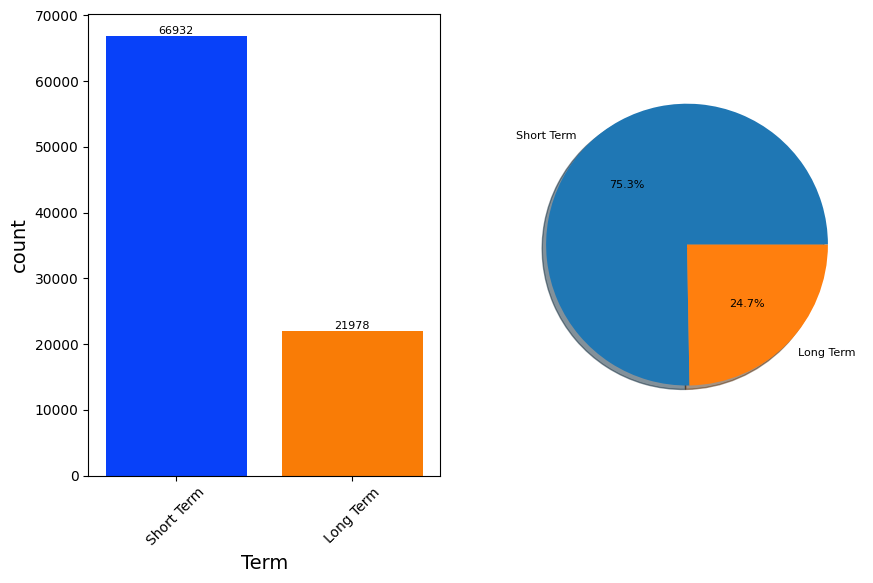

In [42]:
explore_cat_feature_distribution(df_duplicates_removed,'Term')

In [43]:
bivariate_analysis_cat_cat(df_duplicates_removed,'Loan Status','Term')


Frequency cross-tabulation:
Term          Long Term  Short Term
Loan Status                        
Loan Given        12714       51023
Loan Refused       9264       15909

Percentage cross-tabulation:
Term          Long Term  Short Term
Loan Status                        
Loan Given    57.848758     76.2311
Loan Refused  42.151242     23.7689


Chi-Squared Test of Independence
Chi-Square Statistic: 2753.6255493272265
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[15755.39068721 47981.60931279]
 [ 6222.60931279 18950.39068721]]


Insights: There is strong association between Term and Loan Status based on Chi Squared test of Indepencence

3.7.3.3 Credit Score

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [44]:
explore_num_feature(df_duplicates_removed,'Credit Score')

Name of the Feature is Credit Score
The number of unique values in Credit Score is 326
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 23.999550106849625%
IQR is 30.0


SUMMARY

Name of the Feature is Credit Score
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 23.999550106849625%
The number of unique values in Credit Score is 326
Total number of outliers in Credit Score is 8477
Minimum value of outliers in Credit Score is 585.0 and number of times its repeated is 8
Maximum value of outliers in Credit Score is 7510.0 and number of times its repeated is 10
Credit Score Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000     585.0
0.2000     707.0
0.5000     733.0
0.7500     744.0
0.8000     746.0
0.8500     747.0
0.9000     750.0
0.9500    7040.0
0.9900    7400.0
0.9950    7440.0
0.9990    7480.0
0.9999    7510.0
Name: Credit Score, dtype: float64


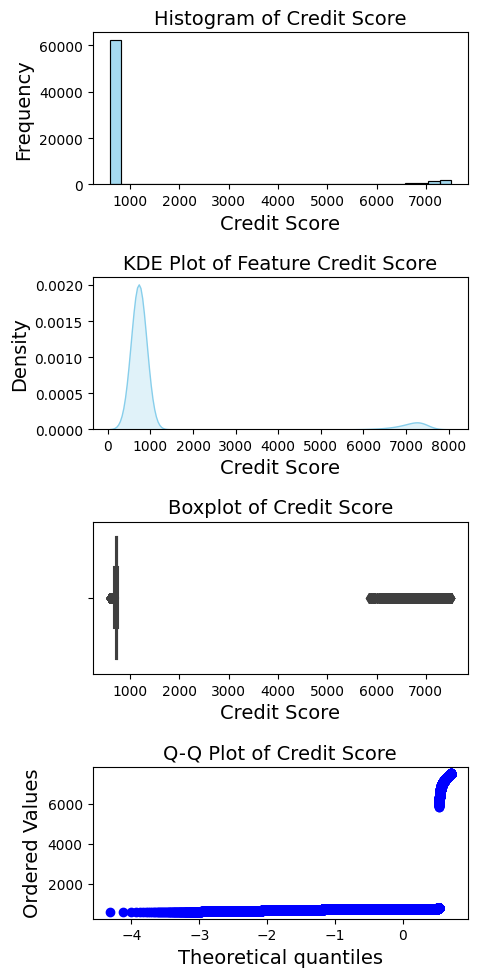

In [58]:
explore_num_feature_distribution(df_duplicates_removed,'Credit Score')

It seems there are outliers and null values in Credit Score which is making the data Skewed. We will filter out the outliers and null values and then plot

In [80]:
# Filter outliers and null values
filtered_data_CS = df_duplicates_removed[(df_duplicates_removed["Credit Score"] < 901) & (df_duplicates_removed["Credit Score"].notnull())]


In [81]:
explore_num_feature(filtered_data_CS,'Credit Score')

Name of the Feature is Credit Score
The number of unique values in Credit Score is 167
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 0.0%
IQR is 30.0


SUMMARY

Name of the Feature is Credit Score
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 0.0%
The number of unique values in Credit Score is 167
Total number of outliers in Credit Score is 3181
Minimum value of outliers in Credit Score is 585.0 and number of times its repeated is 8
Maximum value of outliers in Credit Score is 751.0 and number of times its repeated is 797
Credit Score Skewness: -1.6861175818147731, Kurtosis: 3.1799587319579388

The values at various quantiles are

0.0000    585.0
0.2000    705.0
0.5000    731.0
0.7500    742.0
0.8000    743.0
0.8500    745.0
0.9000    747.0
0.9500    748.0
0.9900    751.0
0.9950    751.0
0.9990    751.0
0.9999    751.0
Name: Credit Score, dtype: float64


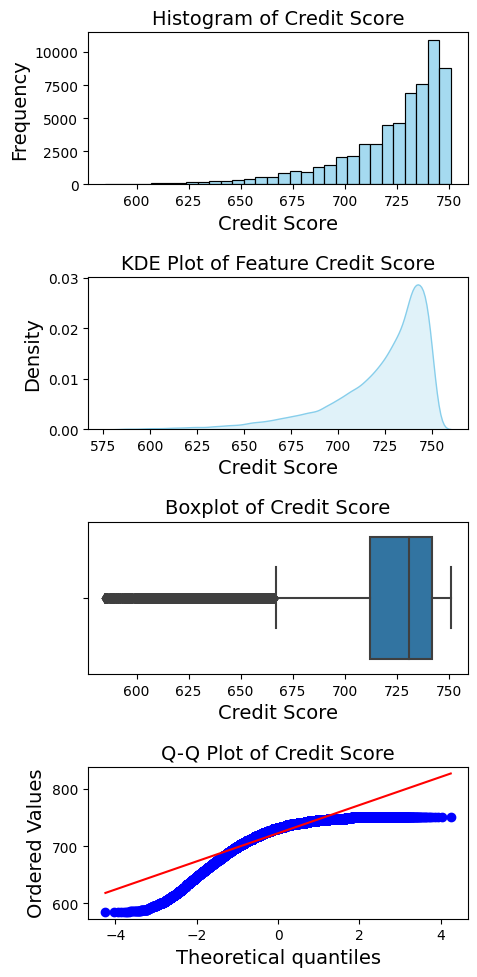

In [82]:
explore_num_feature_distribution(filtered_data_CS,'Credit Score')

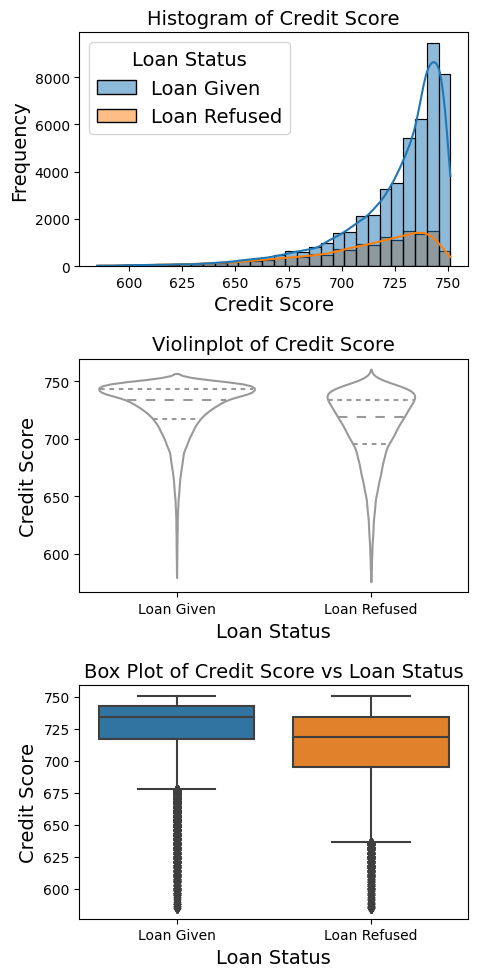

In [60]:
bivariate_analysis_num_cat(filtered_data,'Credit Score','Loan Status')

Insights: The Credit Score is distributed exponentialy and is negatively skewed. We also see median credit score for loan given is higher than that of Loan Refused. From violin plot we can see as the credit score increased the chanches of getting a loan is much higher than rejection of loan. 

3.7.3.4 Years in current job

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [61]:
explore_cat_feature(df_duplicates_removed,'Years in current job')

Name of the Feature is Years in current job
The number of unique values in Years in current job is 11
Years in current job is Categorical Feature and Ordinal
Null %age of Years in current job is 4.293105387470476%


SUMMARY

Name of the Feature is Years in current job
Years in current job is Categorical Feature and Ordinal
Null %age of Years in current job is 4.293105387470476%
The number of unique values in Years in current job is 11


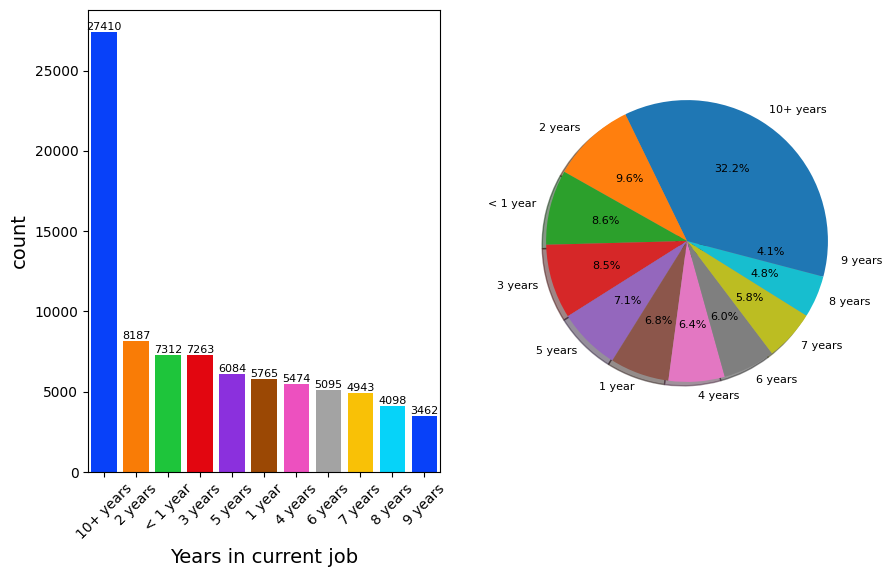

In [62]:
explore_cat_feature_distribution(df_duplicates_removed,'Years in current job')

In [64]:
#null value filteration
filtered_data_YICJ = df_duplicates_removed[df_duplicates_removed['Years in current job'].isnull()==False]

In [65]:
bivariate_analysis_cat_cat(filtered_data_YICJ,'Loan Status','Years in current job')


Frequency cross-tabulation:
Years in current job  1 year  10+ years  2 years  3 years  4 years  5 years  \
Loan Status                                                                   
Loan Given              4098      19966     5967     5297     3926     4378   
Loan Refused            1667       7444     2220     1966     1548     1706   

Years in current job  6 years  7 years  8 years  9 years  < 1 year  
Loan Status                                                         
Loan Given               3630     3508     2920     2428      5210  
Loan Refused             1465     1435     1178     1034      2102  

Percentage cross-tabulation:
Years in current job     1 year  10+ years   2 years    3 years    4 years  \
Loan Status                                                                  
Loan Given            71.084128  72.842028  72.88384  72.931296  71.720862   
Loan Refused          28.915872  27.157972  27.11616  27.068704  28.279138   

Years in current job    5 years   6

There is some association betweeen Years in current job and Loan Status.
Null values can be replaced with values arrived from grouping Years in credit history and finding mode of Years in current job.  

3.7.3.5 Home Ownership

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [68]:
explore_cat_feature(df_duplicates_removed,'Home Ownership')

Name of the Feature is Home Ownership
The number of unique values in Home Ownership is 4
Home Ownership is Categorical Feature and Nominal
Null %age of Home Ownership is 0.0%


SUMMARY

Name of the Feature is Home Ownership
Home Ownership is Categorical Feature and Nominal
Null %age of Home Ownership is 0.0%
The number of unique values in Home Ownership is 4
The unique records are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']


We can see there are two different classes for Home Mortgage and Have Mortgate. We need to apply transformation for these cases in next step.

In [69]:
filtered_data_HO = df_duplicates_removed[df_duplicates_removed['Home Ownership']!='HaveMortgage']

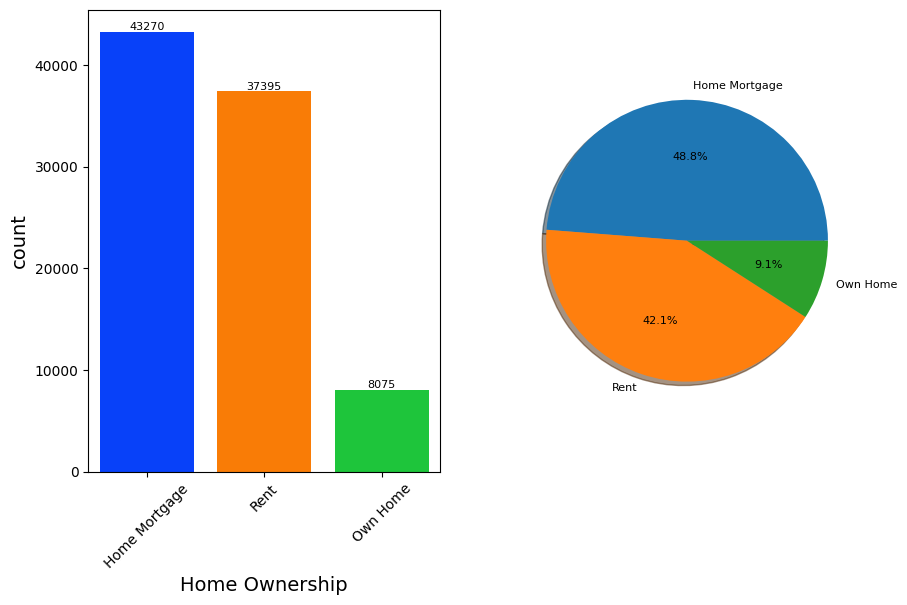

In [70]:
explore_cat_feature_distribution(filtered_data_HO,'Home Ownership')

In [71]:
bivariate_analysis_cat_cat(filtered_data_HO,'Loan Status','Home Ownership')


Frequency cross-tabulation:
Home Ownership  Home Mortgage  Own Home   Rent
Loan Status                                   
Loan Given              32237      5738  25626
Loan Refused            11033      2337  11769

Percentage cross-tabulation:
Home Ownership  Home Mortgage   Own Home       Rent
Loan Status                                        
Loan Given          74.501964  71.058824  68.527878
Loan Refused        25.498036  28.941176  31.472122


Chi-Squared Test of Independence
Chi-Square Statistic: 354.24294754060713
P-value: 1.1943216773934797e-77
Degrees of Freedom: 2
Expected Frequencies:
 [[31012.11708362  5787.44731801 26801.43559838]
 [12257.88291638  2287.55268199 10593.56440162]]


There is some association between Loan Status and Home Ownership. 
We need to change the value of HaveMortgage to Home Mortgage in the next step.

3.7.3.6 Annual Income

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [72]:
explore_num_feature(df_duplicates_removed,'Annual Income')

Name of the Feature is Annual Income
The number of unique values in Annual Income is 36344
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 23.999550106849625%
IQR is 42164.25


SUMMARY

Name of the Feature is Annual Income
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 23.999550106849625%
The number of unique values in Annual Income is 36344
Total number of outliers in Annual Income is 3175
Minimum value of outliers in Annual Income is 4033.0 and number of times its repeated is 1
Maximum value of outliers in Annual Income is 8713547.0 and number of times its repeated is 1
Annual Income Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000       4033.000
0.2000      40764.000
0.5000      61494.000
0.7500      86750.250
0.8000      94600.800
0.8500     103814.000
0.9000     119916.000
0.9500     147645.000
0.9900     239286.960
0.9950     296831.020
0.9990     491575.770
0.9999    1044848.308
Name: Annua

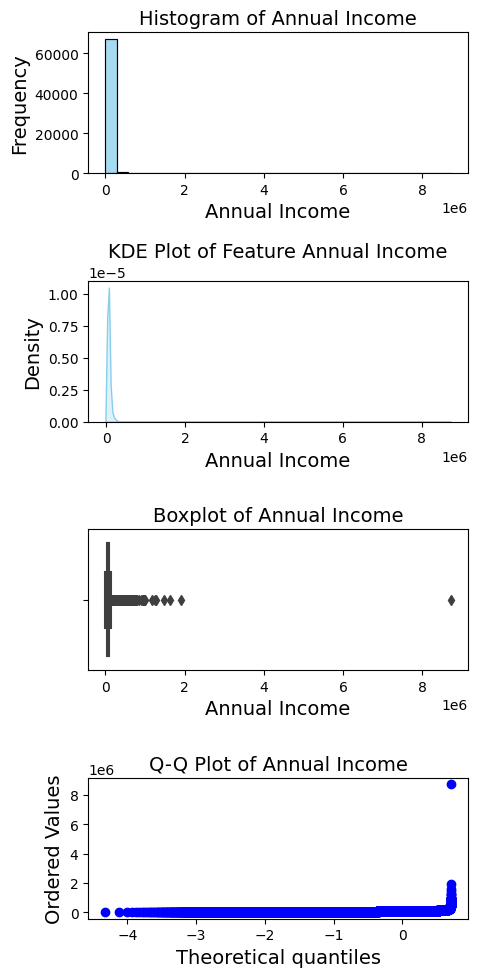

In [84]:
explore_num_feature_distribution(df_duplicates_removed,"Annual Income")

In [79]:
#filtering null values and outliers

filtered_data_AI = df_duplicates_removed[(df_duplicates_removed["Annual Income"] < 296832) & (df_duplicates_removed["Annual Income"].notnull())]


In [83]:
explore_num_feature(filtered_data_AI,'Annual Income')

Name of the Feature is Annual Income
The number of unique values in Annual Income is 36012
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 0.0%
IQR is 41710.0


SUMMARY

Name of the Feature is Annual Income
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 0.0%
The number of unique values in Annual Income is 36012
Total number of outliers in Annual Income is 2932
Minimum value of outliers in Annual Income is 4033.0 and number of times its repeated is 1
Maximum value of outliers in Annual Income is 296820.0 and number of times its repeated is 1
Annual Income Skewness: 1.705486454805211, Kurtosis: 4.4354721890959965

The values at various quantiles are

0.0000      4033.000
0.2000     40700.000
0.5000     61380.000
0.7500     86224.000
0.8000     93881.000
0.8500    102581.200
0.9000    118460.400
0.9500    143479.000
0.9900    206515.530
0.9950    239387.500
0.9990    279250.185
0.9999    295282.428
Name: Annual Income, dtype

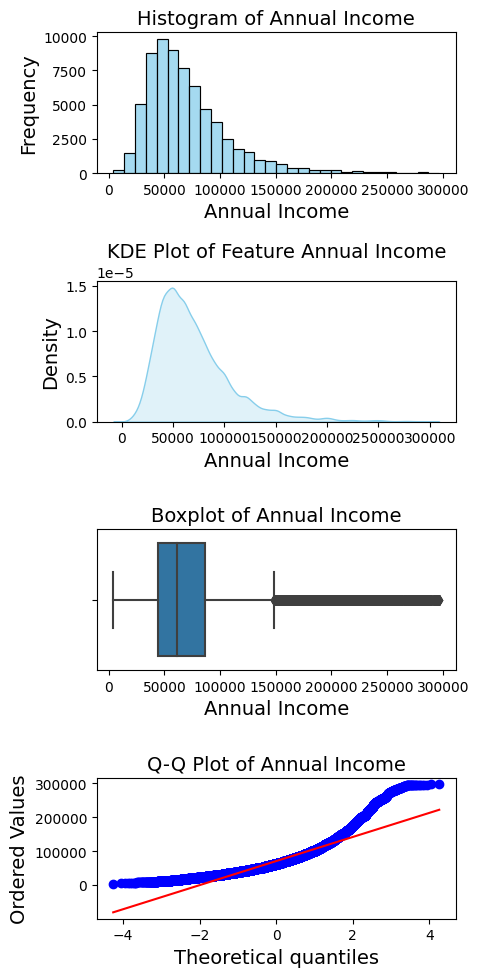

In [85]:
explore_num_feature_distribution(filtered_data_AI,'Annual Income')

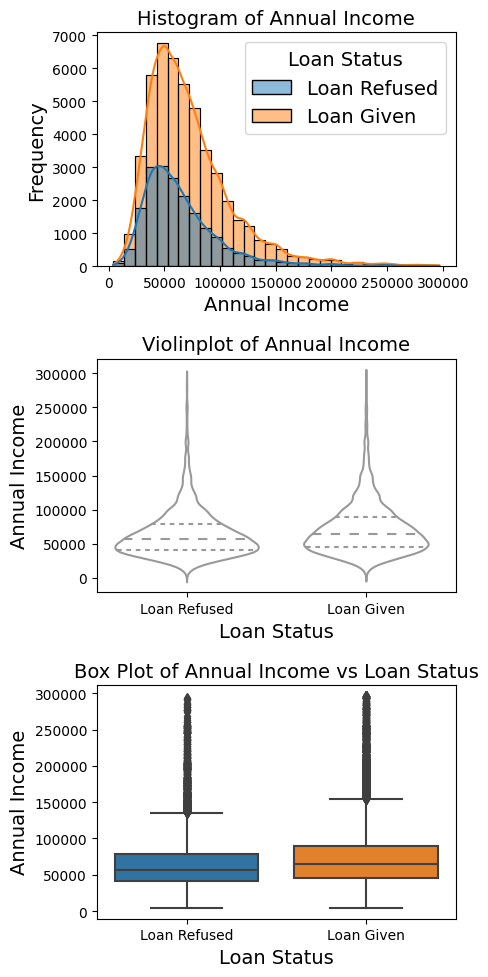

In [86]:
bivariate_analysis_num_cat(filtered_data_AI,'Annual Income','Loan Status')

We can see the Annual Income ranges from 4000 to 1040000. We have very high outlier values after 99.5 percentile. We have filtered out these values and null values to see how Annual Income is distributed.
It can be seen Annual Income is Positively skewed. Transformation will be required in next step.

Insights: Median Annual Income of loan refusal is slightly less than that of loan given. But the density of loan refusal(no. of loan refusal) at median is much higher than that of loan given. Meaning chances of loan getting refused if you have median Annual Income is high.

<h5>4.2.7 Purpose

- How is Purpose distributed?
- How does purpose impact loan status?

df_duplicates_removed['Purpose'].value_counts()

We can observe that for Other there are 2 classes. weill replace other with Other for uniformity

df_duplicates_removed.loc[df_duplicates_removed['Purpose']=='other','Purpose'] = 'Other'

df_duplicates_removed['Purpose'].value_counts()

UNIVARIATE ANALYSIS


plt.figure(figsize=(10, 6))


ax = sns.countplot(y='Purpose', data=df_duplicates_removed, palette='bright', saturation=0.95, order=df_duplicates_removed['Purpose'].value_counts().index)
ax.tick_params(axis='y', rotation=0)


for container in ax.containers:
    ax.bar_label(container, color='black', label_type='center', fontsize=8, padding=10)


total = float(len(df_duplicates_removed))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 6, p.get_y() + p.get_height() / 6., '{:.2f}%'.format((width / total) * 100), va="center",size=7)

plt.show()


BIVARIATE ANALYSIS WITH LOAN STATUS

purpose_crosstabs = pd.crosstab(df_duplicates_removed['Loan Status'], df_duplicates_removed['Purpose'])


percentages_purpose = purpose_crosstabs.div(purpose_crosstabs.sum(axis=0), axis=1) * 100

print("Percentage cross-tabulation:")
print(percentages_purpose)

Insights : for 9 out 12 purpose approximate loan given %age is 70%. To buy a car the approval rate is much higher(80%) than any other category

<h5>4.2.8 Monthly Debt

- How is monthly debt distributed?
- How Monthly Debt impact Loan Status

df_duplicates_removed['Monthly Debt'].isnull().sum()

Null values will be imputed in the end

df_duplicates_removed.groupby('Number of Open Accounts')['Monthly Debt'].median()

We can see that as number of open accounts increases monthly debt also increases. We will inpute these numbers to null values.

median_monthly_debt_by_accounts = df_duplicates_removed.groupby('Number of Open Accounts')['Monthly Debt'].transform('median')

df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].fillna(median_monthly_debt_by_accounts)


UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Monthly Debt'].hist(bins=30, figsize=(5, 5) )
plt.show()

there seems to be outliers in the data that are very large compared to median values. We will treat them

df_duplicates_removed['Monthly Debt'].quantile([0.0,0.2,0.5,0.75,0.8,0.9,0.95,0.99,0.995,0.999,0.9999,0.99999,1])

Fromm 99.9 %tile  there is a steep increase in Monthly Debt. we will replace all the values after 99.9 %tile to 4624.

df_duplicates_removed.loc[df_duplicates_removed['Monthly Debt']>4623, 'Monthly Debt'] = 4624

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Monthly Debt'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

monthly_debt_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Monthly Debt')
monthly_debt_loan_staus_boxplot.set_xlabel('')
monthly_debt_loan_staus_boxplot.set_ylabel('Monthly Debt')
plt.suptitle('')

monthly_debt_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Monthly Debt'],inner = 'quartile',color = 'white')
plt.show()

sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Monthly Debt'],kde=True,hue='Loan Status')

Insights: No ductible relationships found here.

<h5>4.2.9 Years in Credit History

- How is Years in credit history distributed?
- How does years in credit history impacts loans status?


df_duplicates_removed['Years of Credit History'].isnull().sum()

No null values found

df_duplicates_removed['Years of Credit History'].value_counts()

df_duplicates_removed['Years of Credit History'].describe()

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Years of Credit History'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

years_credit_history_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Years of Credit History')
years_credit_history_loan_staus_boxplot.set_xlabel('')
years_credit_history_loan_staus_boxplot.set_ylabel('Years of Credit History')
plt.suptitle('')

credit_history_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Years of Credit History'],inner = 'quartile',color = 'white')
plt.show()

sns.histplot(data=df_duplicates_removed,x = df_duplicates_removed['Years of Credit History'],kde=True,hue='Loan Status')

Insights: Applications with loangers credit history where given loans.

<h5>4.2.10 Month since last delinquent

- How is Month since last delinquent distributed?
- How does monthsince last delinquent impacts loan status?

df_duplicates_removed['Months since last delinquent'].isnull().sum()

Nearly 50% of the data is missing.

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Months since last delinquent'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS

delinquent_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Months since last delinquent')
delinquent_loan_staus_boxplot.set_xlabel('')
delinquent_loan_staus_boxplot.set_ylabel('Months since last delinquent')
plt.suptitle('')

delinquent_months_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Months since last delinquent'],inner = 'quartile',color = 'white')
plt.show()

Applicants delinquent in recent months have more tendency to loan rejection than with applicants who delinquent much earlier

<h5>4.2.11 Number of Open Accounts

- How is Number of Open Account Distributed?
- How Number of Open accounts impacts loan status?

Outliers Handeling

df_duplicates_removed['Number of Open Accounts'].describe()

df_duplicates_removed['Number of Open Accounts'].quantile([0.0,0.5,0.75,0.9,0.95,0.99,0.999,0.9999,1])

We will replace values greater than 99.9%tile to value at 99.9 percentile

df_duplicates_removed.loc[df_duplicates_removed['Number of Open Accounts']>36,'Number of Open Accounts'] = 36

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Number of Open Accounts'].hist(bins=30, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

open_account_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Number of Open Accounts')
open_account_loan_staus_boxplot.set_xlabel('')
open_account_loan_staus_boxplot.set_ylabel('Number of Open Accounts')
plt.suptitle('')

open_account_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Number of Open Accounts'],inner = 'quartile',color = 'white')
plt.show()

Insights: We can see if number of open accounts is 0 then loan application will be rejected

<h5>4.2.12 Number of Credit Problems

- How is number of credit problems distributed?
- How does number of credit problem  impacts loan status?

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Number of Credit Problems'].hist(bins=10, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

credit_problemt_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Number of Credit Problems')
credit_problemt_loan_staus_boxplot.set_xlabel('')
credit_problemt_loan_staus_boxplot.set_ylabel('Number of Open Accounts')
plt.suptitle('')

credit_problems_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Number of Credit Problems'],inner = 'quartile',color = 'white')
plt.show()

Insights: We can see for loan refused density of applicants with0 credit problems is much higher than for applicants whose loan was approved. 

<h5>4.2.13 Current Credit Balance

- How is current credit balance distributed?
- How does current credit balance impacts loan status?

df_duplicates_removed['Current Credit Balance'].describe()

df_duplicates_removed['Current Credit Balance'].quantile([0.0,0.5,0.75,0.9,0.95,0.99,0.999,0.9999,1])

# Define labels for quantiles
quantile_labels = ['0.0000', '0.5000', '0.7500', '0.9000', '0.9500', '0.9900', '0.9990', '0.9999', '1.0000']

# Get the quantiles
quantiles = df_duplicates_removed['Current Credit Balance'].quantile([0.0, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999, 1])

# Convert exponential numbers to decimal format with 2 decimal places and include labels
formatted_quantiles = ["{}: {:.2f}".format(label, value) for label, value in zip(quantile_labels, quantiles)]

df_formated_quantile = pd.DataFrame(formatted_quantiles)

df_formated_quantile


We can see there are large value outliers after 99%ile. We will replace it with value at 99%ile

df_duplicates_removed.loc[df_duplicates_removed['Current Credit Balance']>81008,'Current Credit Balance'] = 81008

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Current Credit Balance'].hist(bins=20, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

credit_balance_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Current Credit Balance')
credit_balance_loan_staus_boxplot.set_xlabel('')
credit_balance_loan_staus_boxplot.set_ylabel('Current Credit Balance')
plt.suptitle('')

credit_balance_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Current Credit Balance'],inner = 'quartile',color = 'white')
plt.show()

<h5>4.2.14 Maximum Open Credit

- How Maximum Open Credit is distributed?
- How does Maximum open credit impacts loan status?


df_duplicates_removed['Maximum Open Credit'].isnull().sum()

df_duplicates_removed['Maximum Open Credit'].nunique()

We will replace the null values with mean values

df_duplicates_removed['Maximum Open Credit'].fillna(df_duplicates_removed['Maximum Open Credit'].mean(),inplace=True)

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Maximum Open Credit'].hist(bins=20, figsize=(5, 5) )
plt.show()

sns.distplot(df_duplicates_removed['Maximum Open Credit']**(1/2))

quantile_labels = ['0.0000', '0.5000', '0.7500', '0.9000', '0.9500', '0.9900', '0.9990', '0.9999', '1.0000']

# Get the quantiles
quantiles_1 = df_duplicates_removed['Maximum Open Credit'].quantile([0.0, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999, 1])

# Convert exponential numbers to decimal format with 2 decimal places and include labels
formatted_quantiles_1 = ["{} {:.2f}".format(label, value) for label, value in zip(quantile_labels, quantiles_1)]

df_formated_quantile_1 = pd.DataFrame(formatted_quantiles_1)

df_formated_quantile_1

There is huge markup in values after 99%ile. We will replace these values with value at 99%ile

df_duplicates_removed.loc[df_duplicates_removed['Maximum Open Credit']>171424,'Maximum Open Credit'] = 171424

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Maximum Open Credit'].hist(bins=20, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

max_credit_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Maximum Open Credit')
max_credit_loan_staus_boxplot.set_xlabel('')
max_credit_loan_staus_boxplot.set_ylabel('Maximum Open Credit')
plt.suptitle('')

max_credit_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Maximum Open Credit'],inner = 'quartile',color = 'white')
plt.show()

Insights: There is higher density of loan rejection cases at 25% & 50 %percentile than at loan given.

<h5>4.2.15 Bankruptcies

- How Bankruptcies is distributed?
- How does Bankruptcies impacts loan status?


df_duplicates_removed['Bankruptcies'].value_counts()

df_duplicates_removed['Bankruptcies'].isnull().sum()

We will fill null vaules with median

df_duplicates_removed['Bankruptcies'].fillna(df_duplicates_removed['Bankruptcies'].median(),inplace=True)

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Bankruptcies'].hist(bins=20, figsize=(5, 5) )
plt.show()

S WITH LOAN STATUS

BIVARIATE ANALYSIS WITH LOAN STATUS

bankruptcy_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Bankruptcies')
bankruptcy_loan_staus_boxplot.set_xlabel('')
bankruptcy_loan_staus_boxplot.set_ylabel('Bankruptcies')
plt.suptitle('')

bankruptcies_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Bankruptcies'],inner = 'quartile',color = 'white')
plt.show()

Insights: Applicants with 0 Bankruptcies have higher chances of getting loan approved

<h5>4.2.16 Tax Liens

- How Tax Liens is distributed?
- How does Tax Liens impacts loan status?

df_duplicates_removed['Tax Liens'].isnull().sum()

We will replace null values with median

df_duplicates_removed['Tax Liens'].fillna(df_duplicates_removed['Tax Liens'].median(),inplace=True)

UNIVARIATE ANALYSIS

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed['Tax Liens'].hist(bins=20, figsize=(5, 5) )
plt.show()

BIVARIATE ANALYSIS WITH LOAN STATUS

tax_loan_staus_boxplot = df_duplicates_removed.boxplot(by='Loan Status', column='Tax Liens')
tax_loan_staus_boxplot.set_xlabel('')
tax_loan_staus_boxplot.set_ylabel('Tax Liens')
plt.suptitle('')

tax_loan_staus_voilinplot = sns.violinplot(x = df_duplicates_removed['Loan Status'],y = df_duplicates_removed['Tax Liens'],inner = 'quartile',color = 'white')
plt.show()

Insights: Applicants with 0 tax liens have very high chanches og getting loan rejected